# Data analysis: Velib

Authors: J. Guérin, ANITI & O. Roustant, INSA Toulouse. January 2021.  
<br/>
<div style="text-align: justify">    
We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.
</div>
<br/>
<div style="text-align: justify">  
From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.
</div>

### Preliminary: Load and visualize data

In [13]:
%config Completer.use_jedi = False # To make sure that autocompletion will work 

import pandas as pd

path    = ''  # If data already in current directory
loading = pd.read_csv(path + 'velibLoading.csv', sep = " ")

loading.head()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758


In [14]:
velibAdds = pd.read_csv(path + 'velibAdds.csv', sep = " ")

velibAdds.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


### Preliminary: plot the loading of the first station

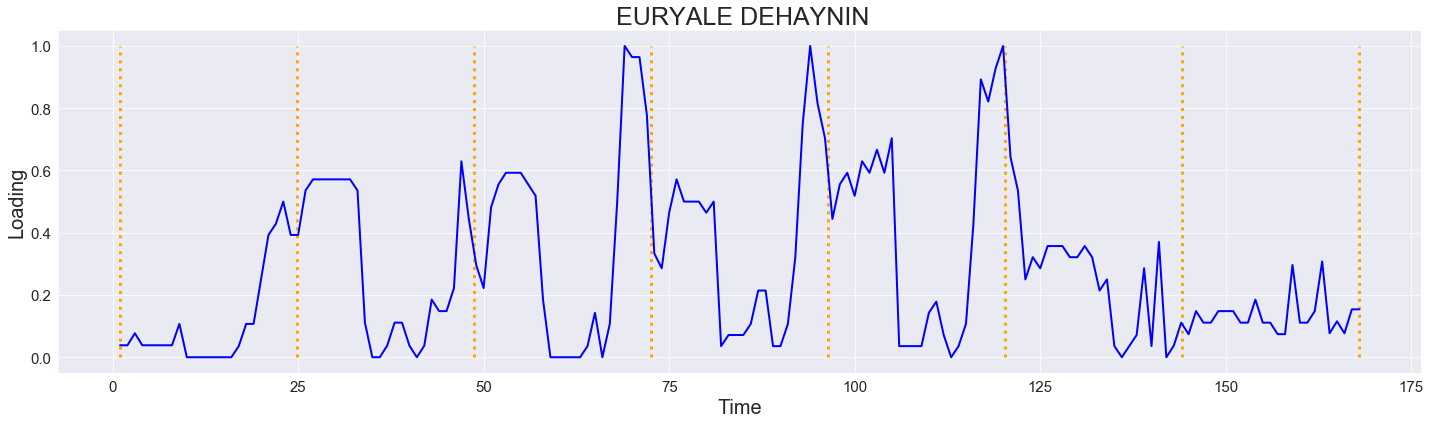

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

i = 0

loading_data = loading.to_numpy()

n_steps = loading.shape[1]
time    = np.linspace(1, n_steps, n_steps)

plt.figure(figsize = (20, 6))

plt.plot(time, loading_data[i, :], linewidth = 2, color = 'blue')
plt.vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
           colors = "orange", linestyle = "dotted", linewidth = 3)

plt.xlabel('Time', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title(velibAdds.names[1 + i], fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

# Descriptive statistics.

Some ideas : 

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).
2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry?
3. Investigate the temporal correlation of the variables. 
For instance, for a given station, plot the loading at t+h versus loading at time t.
Visualize the correlation matrix by an image plot. Interpret the result.
4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use a different color for stations which are located on a hill.
5. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

### Question 1 
Draw a matrix of plots of size 4*4 corresponding to the first 16 stations. (_Do not forget the vertical lines corresponding to days_)

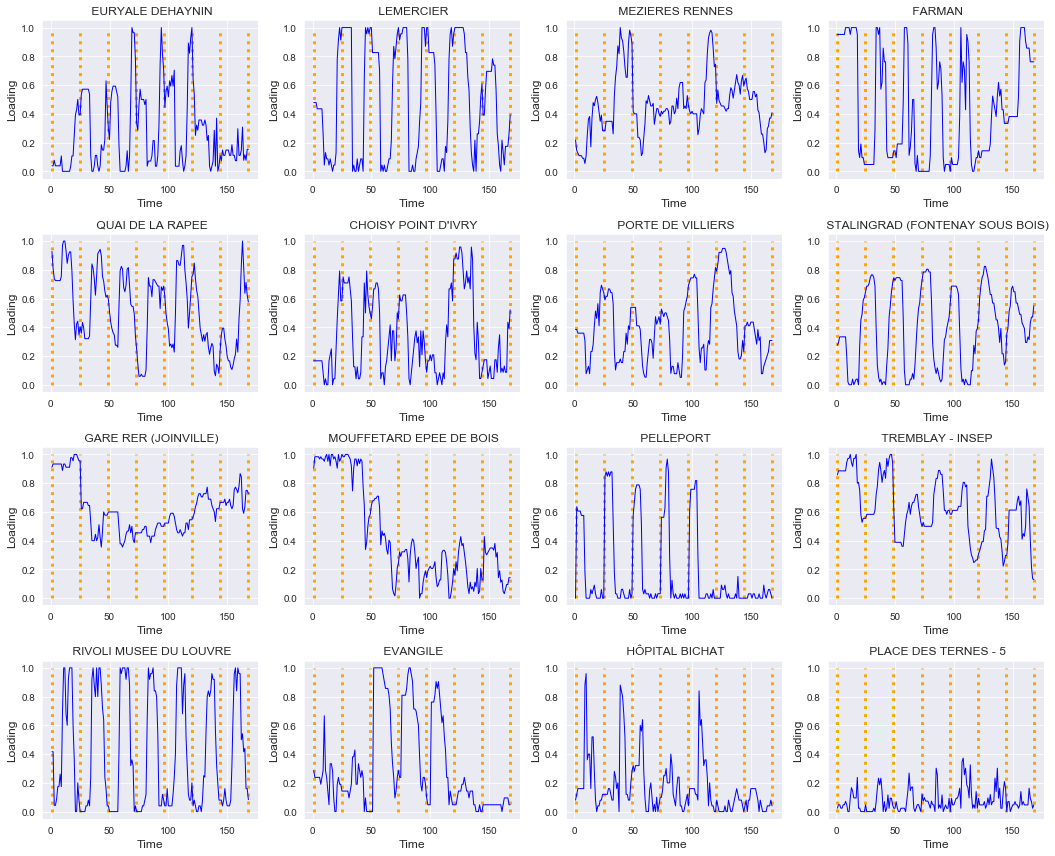

In [16]:
fig, axs = plt.subplots(4, 4, figsize = (15,12))
for i in range(4):
    for j in range(4):
        k_station = 4 * i + j
        axs[i, j].plot(time, loading_data[k_station, :], linewidth = 1, color = 'blue')
        axs[i, j].set_title(velibAdds.names[1 + k_station], fontsize = 12)
        axs[i, j].vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
                         colors = "orange", linestyle = "dotted", linewidth = 3)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

### Question 2 
Draw the boxplot of the variables, sorted in time order. What can you say about the distribution of the variables? Position, dispersion, symmetry?

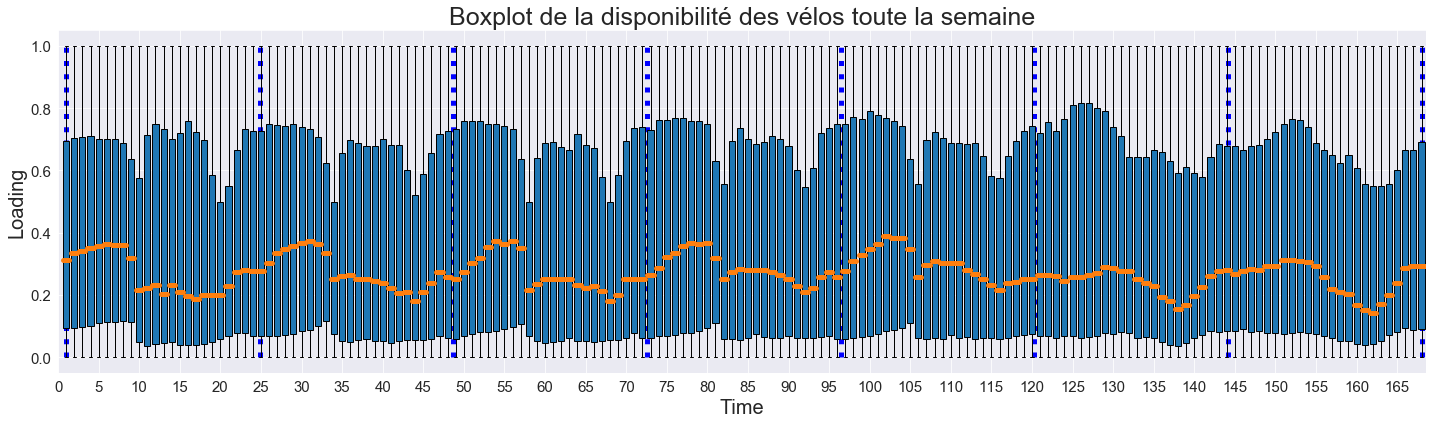

In [17]:
plt.figure(figsize = (20,6))

bp = plt.boxplot(loading_data, widths = 0.75, patch_artist = True)

for median in bp['medians']:
    median.set(linewidth=5)
    
plt.vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
           colors = "blue", linestyle = "dotted", linewidth = 5)

plt.xlabel('Time', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplot de la disponibilité des vélos toute la semaine", fontsize = 25)
plt.xticks(ticks = np.arange(0, 168, 5), labels=np.arange(0, 168, 5), fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

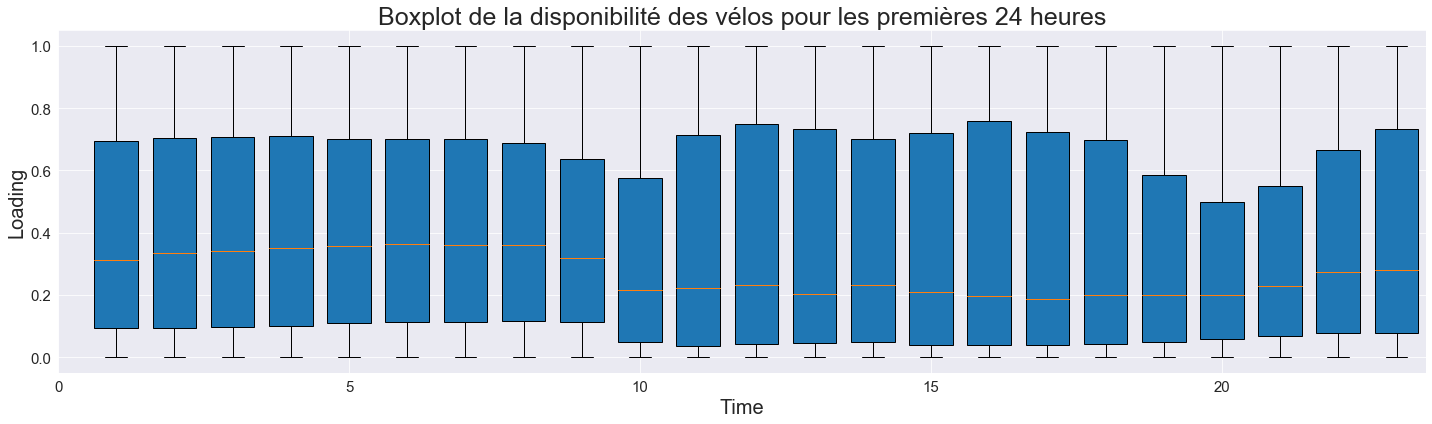

In [18]:
plt.figure(figsize = (20,6))

bp = plt.boxplot(loading_data[:,0:23], widths = 0.75, patch_artist = True)




plt.xlabel('Time', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplot de la disponibilité des vélos pour les premières 24 heures", fontsize = 25)
plt.xticks(ticks = np.arange(0, 23, 5), labels=np.arange(0, 23, 5), fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

### Question 3 
Investigate the temporal correlation of the variables. For instance, for a given station, plot the loading at t+h versus loading at time t. Visualize the correlation matrix by an image plot. Interpret the result.

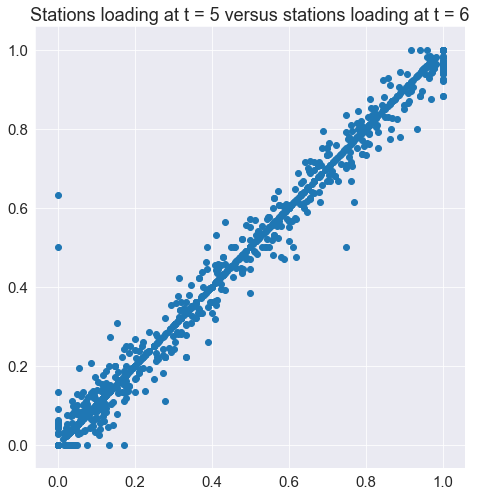

In [19]:
# Scatter plot t versus t+h

t = 5
h = 1

plt.figure(figsize = (7, 7))

plt.scatter(loading_data[:, t], loading_data[:, t + h])

plt.title("Stations loading at t = %i versus stations loading at t = %i" % (t, t + h), fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

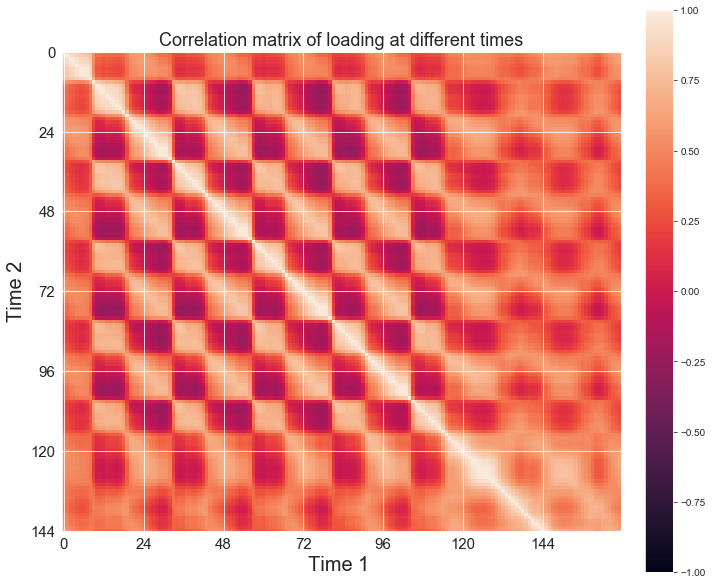

In [20]:
# Correlation matrix 

CM = np.corrcoef(loading_data.T)

plt.figure(figsize = (10, 10))
plt.imshow(CM, vmin=-1)

plt.title("Correlation matrix of loading at different times", fontsize = 18)
plt.xticks(ticks = np.arange(0, 168, 24), labels = np.arange(0, 168, 24), fontsize = 15)
plt.yticks(ticks = np.arange(0, 168, 24), labels = np.arange(0, 168, 24), fontsize = 15)
plt.xlabel('Time 1 ', fontsize = 20)
plt.ylabel('Time 2', fontsize = 20)
plt.colorbar(fraction = 0.046, pad = 0.04)

plt.tight_layout()
plt.show()


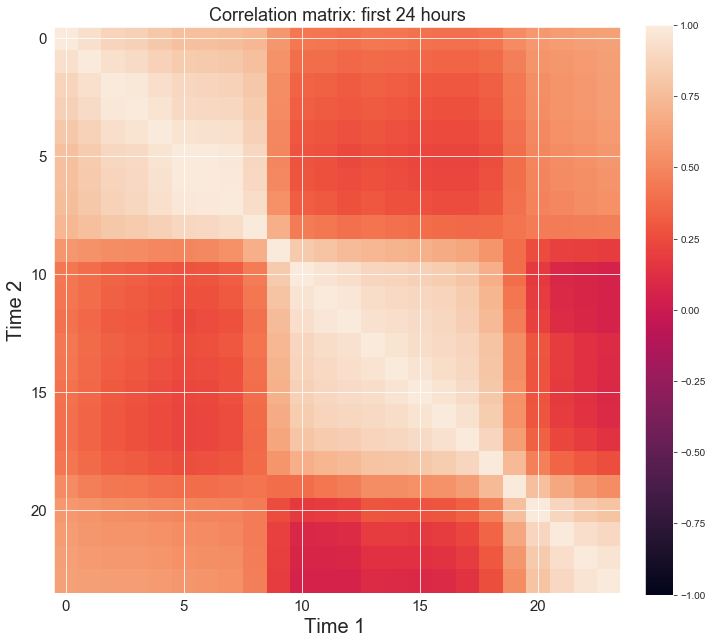

In [21]:
# Correlation matrix zoom first 24h

CM = np.corrcoef(loading_data[:, :24].T)

plt.figure(figsize = (10, 10))
plt.imshow(CM, vmin=-1)

plt.title("Correlation matrix: first 24 hours", fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Time 1 ', fontsize = 20)
plt.ylabel('Time 2', fontsize = 20)
plt.colorbar(fraction = 0.046, pad = 0.04)
plt.tight_layout()
plt.show()

### Question 4

Plot the stations coordinates on a 2D map (latitude versus longitude). Use a different color for stations which are located on a hill.

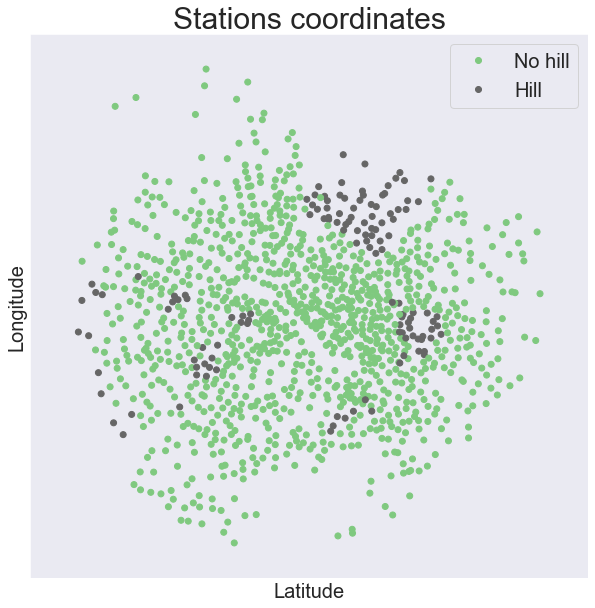

In [22]:
import matplotlib.cm as cm

plt.figure(figsize = (10, 10))

sctrplt = plt.scatter(velibAdds['latitude'], velibAdds['longitude'], c = velibAdds['bonus'], cmap = cm.Accent)

plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('Longitude', fontsize = 20)
plt.title('Stations coordinates', fontsize = 30)
plt.xticks([])
plt.yticks([])
plt.legend(handles = sctrplt.legend_elements()[0], labels = ["No hill", "Hill"], fontsize = 20)
plt.show()

### Question 5

Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

Number of stations on a hill: 127


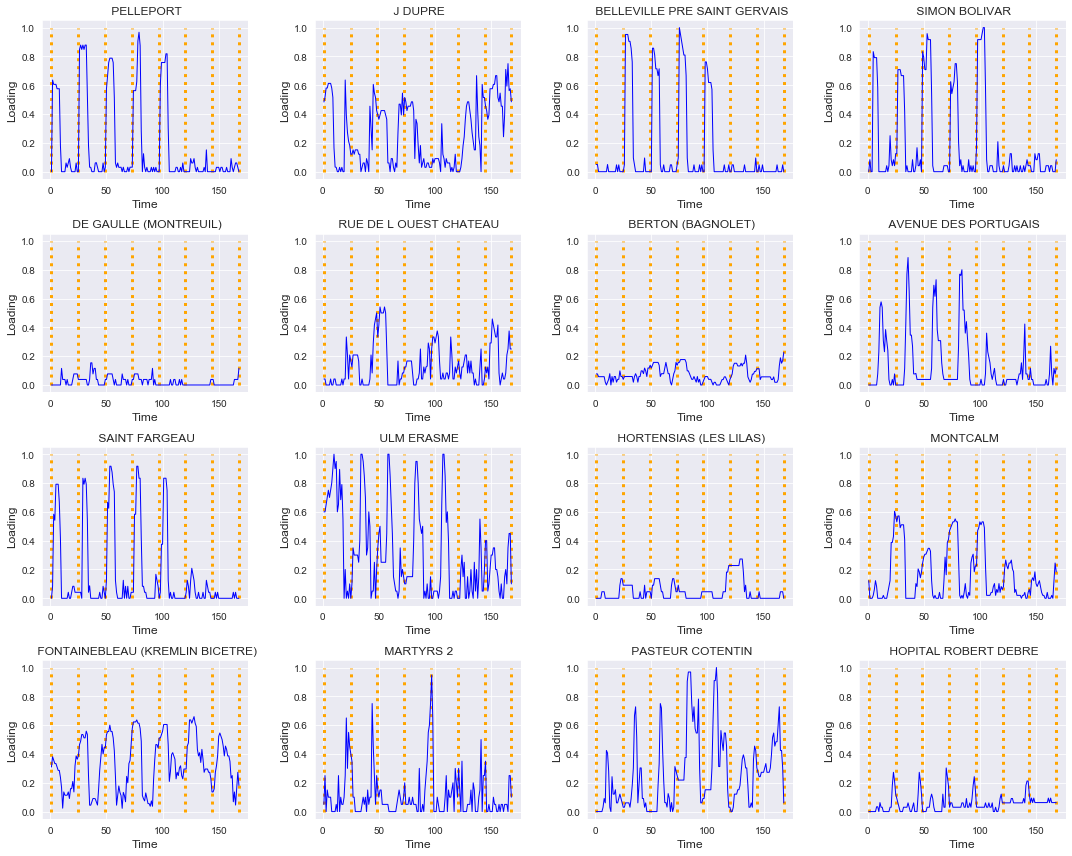

In [23]:
# Q1

data_hill = loading_data[velibAdds["bonus"] == 1]
dataAdds_hill = velibAdds.to_numpy()[velibAdds["bonus"] == 1]

print("Number of stations on a hill: %i" % dataAdds_hill.shape[0])

fig, axs = plt.subplots(4, 4, figsize = (15,12))
for i in range(4):
    for j in range(4):
        k_station = 4 * i + j
        axs[i, j].plot(time, data_hill[k_station, :], linewidth = 1, color = 'blue')
        axs[i, j].set_title(dataAdds_hill[k_station, 3], fontsize = 12)
        axs[i, j].vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
                         colors = "orange", linestyle = "dotted", linewidth = 3)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

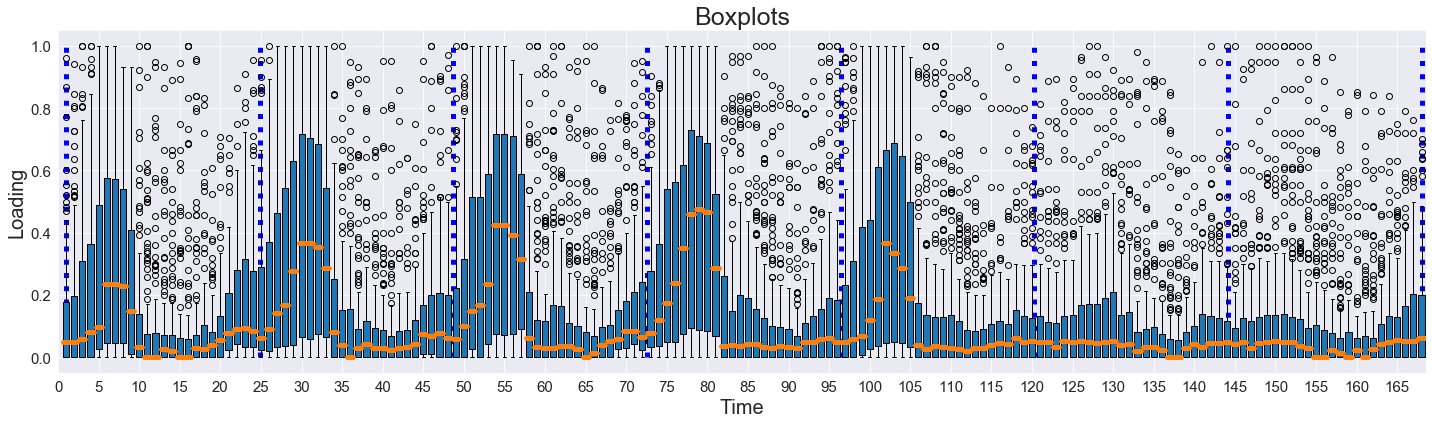

In [24]:
# Q2

plt.figure(figsize = (20,6))

bp = plt.boxplot(data_hill, widths = 0.75, patch_artist = True)

for median in bp['medians']:
    median.set(linewidth=5)
    
plt.vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
           colors = "blue", linestyle = "dotted", linewidth = 5)

plt.xlabel('Time', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplots", fontsize = 25)
plt.xticks(ticks = np.arange(0, 168, 5), labels=np.arange(0, 168, 5), fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

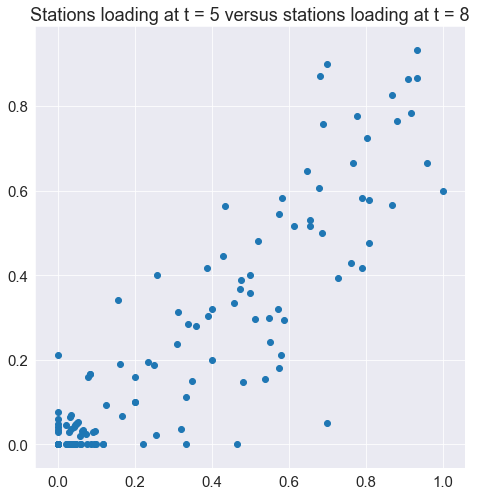

In [25]:
# Q3

t = 5
h = 3

plt.figure(figsize = (7, 7))

plt.scatter(data_hill[:, t], data_hill[:, t + h])

plt.title("Stations loading at t = %i versus stations loading at t = %i" % (t, t + h), fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

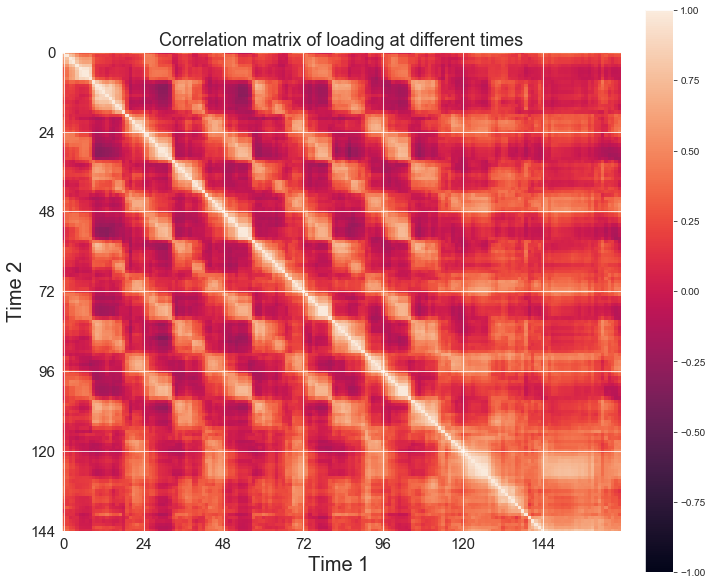

In [26]:
# Correlation matrix 

CM = np.corrcoef(data_hill.T)

plt.figure(figsize = (10, 10))
plt.imshow(CM, vmin=-1)

plt.title("Correlation matrix of loading at different times", fontsize = 18)
plt.xticks(ticks = np.arange(0, 168, 24), labels = np.arange(0, 168, 24), fontsize = 15)
plt.yticks(ticks = np.arange(0, 168, 24), labels = np.arange(0, 168, 24), fontsize = 15)
plt.xlabel('Time 1 ', fontsize = 20)
plt.ylabel('Time 2', fontsize = 20)
plt.colorbar(fraction = 0.046, pad = 0.04)

plt.tight_layout()
plt.show()

Number of stations no hill: 1062


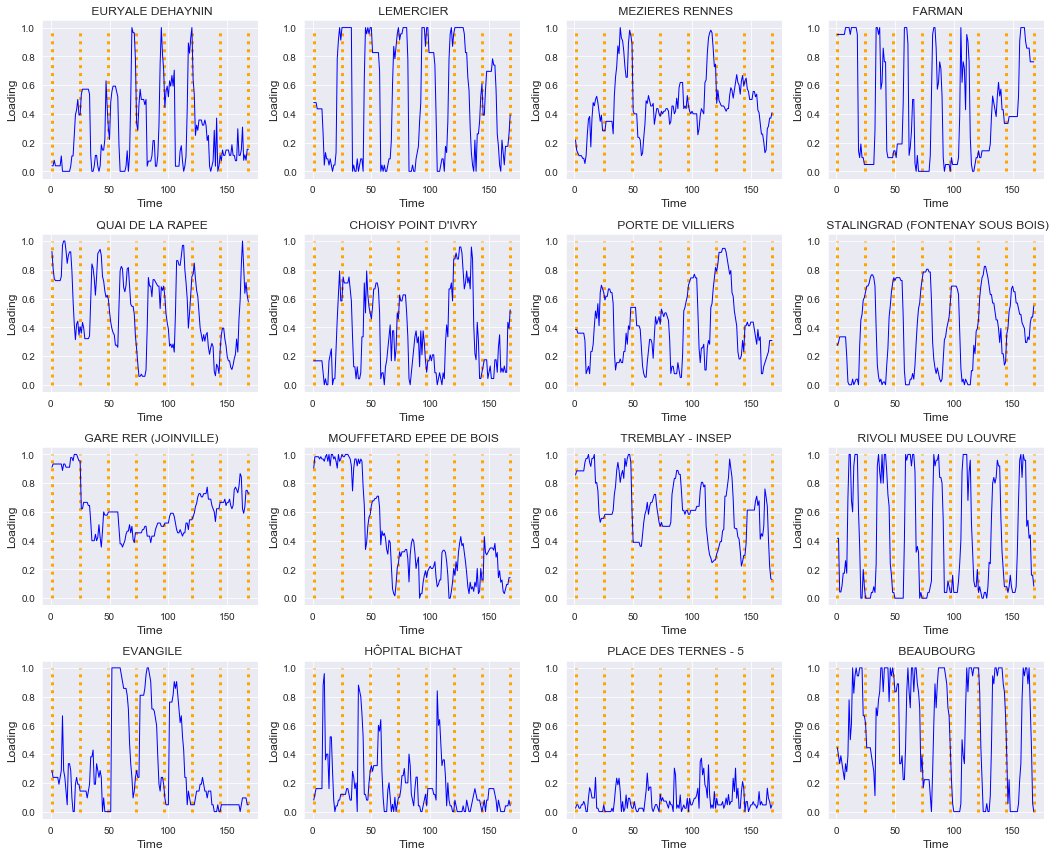

In [27]:
# Q1

data_nohill = loading_data[velibAdds["bonus"] == 0]
dataAdds_nohill = velibAdds.to_numpy()[velibAdds["bonus"] == 0]

print("Number of stations no hill: %i" % dataAdds_nohill.shape[0])

fig, axs = plt.subplots(4, 4, figsize = (15,12))
for i in range(4):
    for j in range(4):
        k_station = 4 * i + j
        axs[i, j].plot(time, data_nohill[k_station, :], linewidth = 1, color = 'blue')
        axs[i, j].set_title(dataAdds_nohill[k_station, 3], fontsize = 12)
        axs[i, j].vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
                         colors = "orange", linestyle = "dotted", linewidth = 3)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

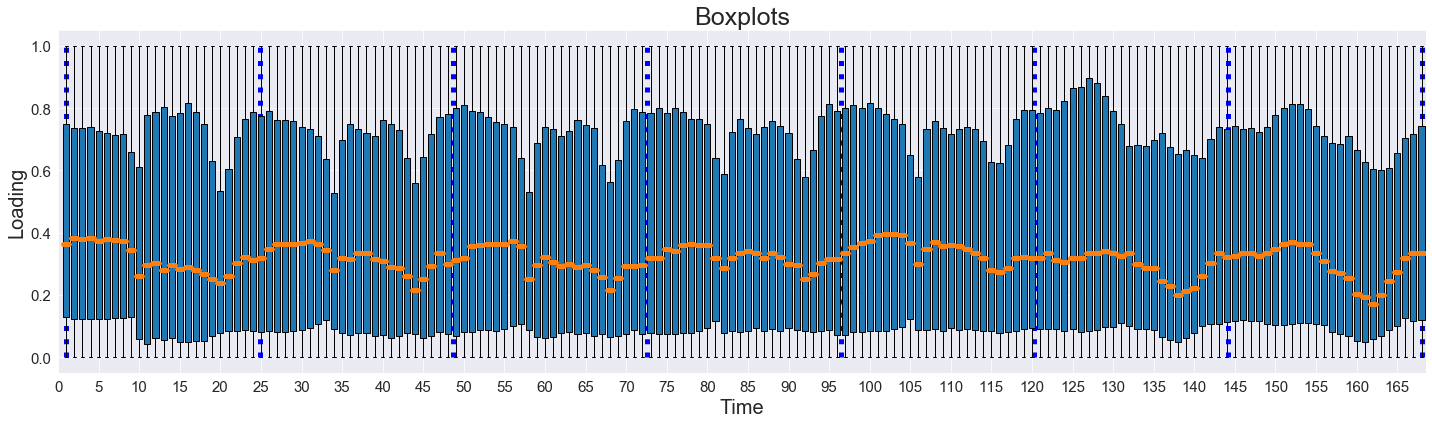

In [28]:
# Q2

plt.figure(figsize = (20,6))

bp = plt.boxplot(data_nohill, widths = 0.75, patch_artist = True)

for median in bp['medians']:
    median.set(linewidth=5)
    
plt.vlines(x = np.linspace(1, n_steps, 8), ymin = 0, ymax = 1, 
           colors = "blue", linestyle = "dotted", linewidth = 5)

plt.xlabel('Time', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplots", fontsize = 25)
plt.xticks(ticks = np.arange(0, 168, 5), labels=np.arange(0, 168, 5), fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

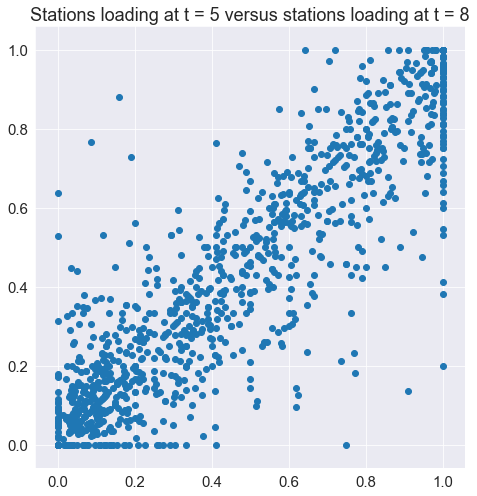

In [29]:
# Q3

t = 5
h = 3

plt.figure(figsize = (7, 7))

plt.scatter(data_nohill[:, t], data_nohill[:, t + h])

plt.title("Stations loading at t = %i versus stations loading at t = %i" % (t, t + h), fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

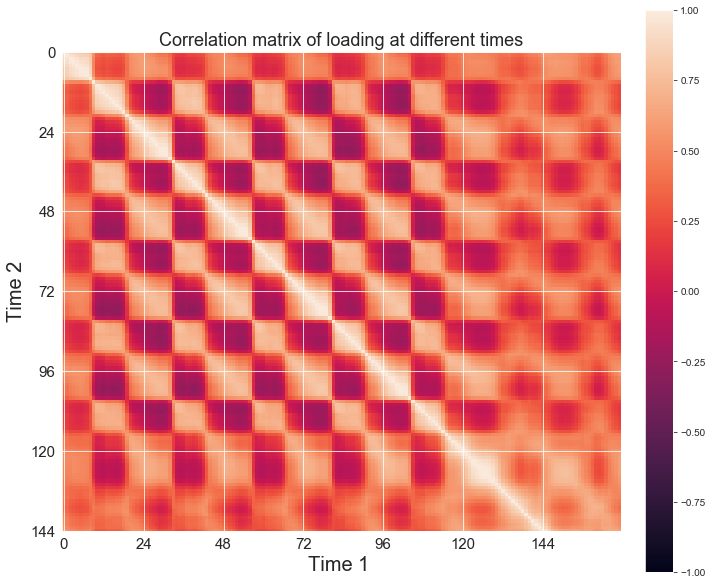

In [30]:
# Correlation matrix 

CM = np.corrcoef(data_nohill.T)

plt.figure(figsize = (10, 10))
plt.imshow(CM, vmin=-1)

plt.title("Correlation matrix of loading at different times", fontsize = 18)
plt.xticks(ticks = np.arange(0, 168, 24), labels = np.arange(0, 168, 24), fontsize = 15)
plt.yticks(ticks = np.arange(0, 168, 24), labels = np.arange(0, 168, 24), fontsize = 15)
plt.xlabel('Time 1 ', fontsize = 20)
plt.ylabel('Time 2', fontsize = 20)
plt.colorbar(fraction = 0.046, pad = 0.04)

plt.tight_layout()
plt.show()

### Analyse en composantes principales:

In [34]:
from sklearn.decomposition import PCA

In [44]:
#définition de la commande
pcaR = PCA()
VelibR = pd.DataFrame(scale(loading), columns = loading.columns) #sur les données centrées réduites
#composantes principales
C = pcaR.fit(VelibR).transform(VelibR)


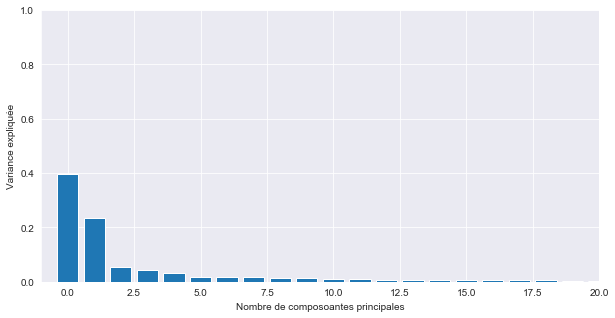

In [45]:
plt.figure(figsize = (10,5))
x=np.arange(pcaR.explained_variance_ratio_.size)
plt.bar(x, pcaR.explained_variance_ratio_)
plt.axis((-1, 20, 0, 1))
plt.xlabel('Nombre de composoantes principales')
plt.ylabel('Variance expliquée')
plt.show()

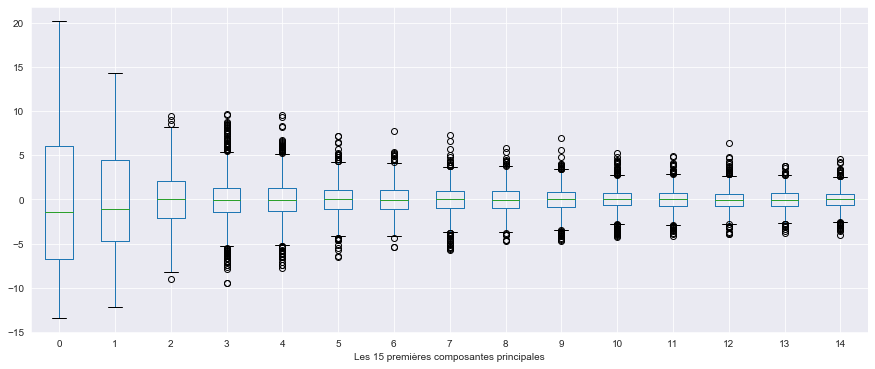

In [46]:
pd.DataFrame(C[:,0:15]).plot(kind = "box", figsize = (15, 6) )
plt.xlabel('Les 15 premières composantes principales')
plt.show()

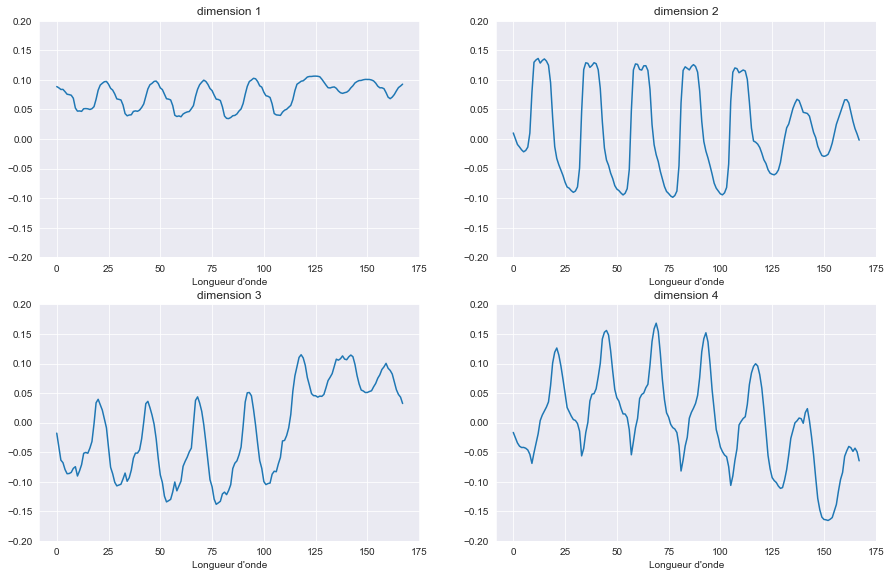

In [39]:
fig = plt.figure(1, figsize = (15, 20))
x = np.linspace(0, 167, 168)
for i in range(0, 4):
    fig.add_subplot(4, 2, i+1)
    plt.ylim((-0.2, 0.2))
    plt.plot(x,pcaR.components_[i])
    plt.xlabel("Longueur d'onde")
    plt.title("dimension "+str(i+1))
plt.show()

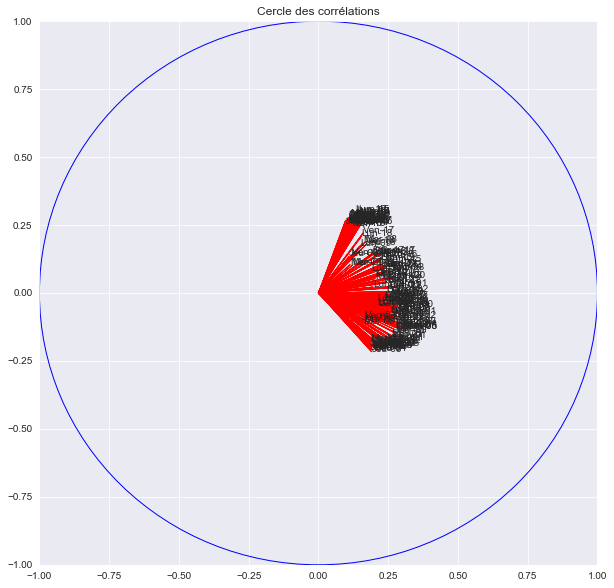

In [40]:
coord1 = pcaR.components_[0] * np.sqrt(pcaR.explained_variance_[0])
coord2 = pcaR.components_[1] * np.sqrt(pcaR.explained_variance_[1])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, VelibR.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.0001)
plt.axis((-1, 1, -1, 1))

c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Cercle des corrélations')
plt.show()

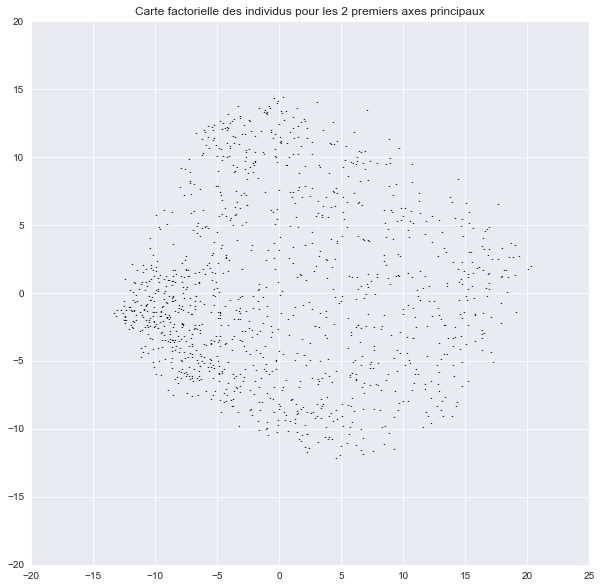

In [47]:
#En r, classement selon le cos2. Possible de le faire ici?
pc1 = C[:,0]
pc2 = C[:,1]
plt.figure(figsize = (10, 10))
for i, j in zip(pc1, pc2):
    plt.text(i, j, ".",fontweight='bold')
plt.axis((-20, 25, -20, 20))
plt.title('Carte factorielle des individus pour les 2 premiers axes principaux')
plt.show()

### K-means:

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from matplotlib import colors
from sklearn.preprocessing import scale

#### sur les composantes de l'ACP

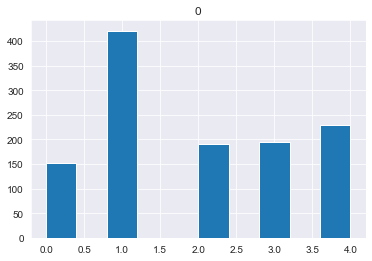

In [43]:
VelibCP = C[:,0:5] # cinq premières composantes
kmeans = KMeans(n_clusters = 5, random_state = 0, n_jobs = -1).fit(VelibCP)
kclassesACP = kmeans.labels_
# effectifs des classes
pd.DataFrame(kclassesACP).hist()
plt.show()

#### Sur les données initiales ou toutes les composantes

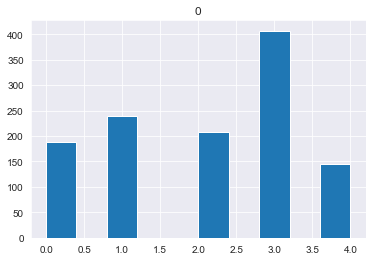

In [153]:
kmeans=KMeans(n_clusters = 5, random_state = 0, n_jobs = -1).fit(VelibR)
kclasses = kmeans.labels_
pd.DataFrame(kclasses).hist()
plt.show()

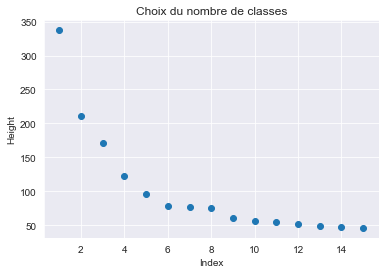

In [49]:
#help(linkage)
VelibR=pd.DataFrame(scale(loading),columns=loading.columns)

Z = linkage(VelibR, 'ward', metric = 'euclidean') # choix de la distance
height = Z[:, 2]  # Décroissance des sauts
x = np.arange(15) + 1


height = sorted(height, reverse = True)

plt.scatter(x, height[0:15])  #height[0:16]/sum(height[0:16])*100
plt.xlabel('Index')
plt.ylabel('Height')
plt.title("Choix du nombre de classes")
plt.show()


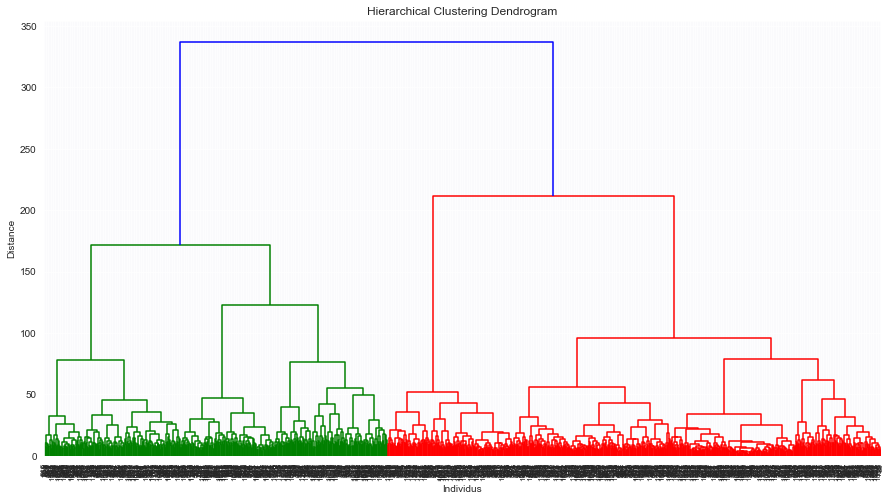

In [50]:
plt.figure(figsize = (15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Individus')
plt.ylabel('Distance')
dendrogram(Z, leaf_font_size = 8., labels = loading.index)
plt.show()

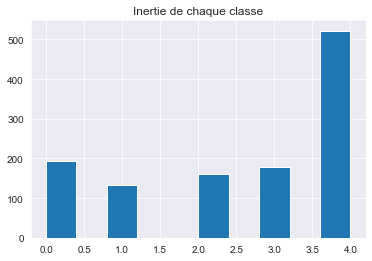

In [68]:
#help(fcluster)
classesCAH = fcluster(Z,t=100, criterion='distance')
classesCAH = classesCAH - 1
pd.DataFrame(classesCAH).hist()
plt.title("Inertie de chaque classe")
plt.show()

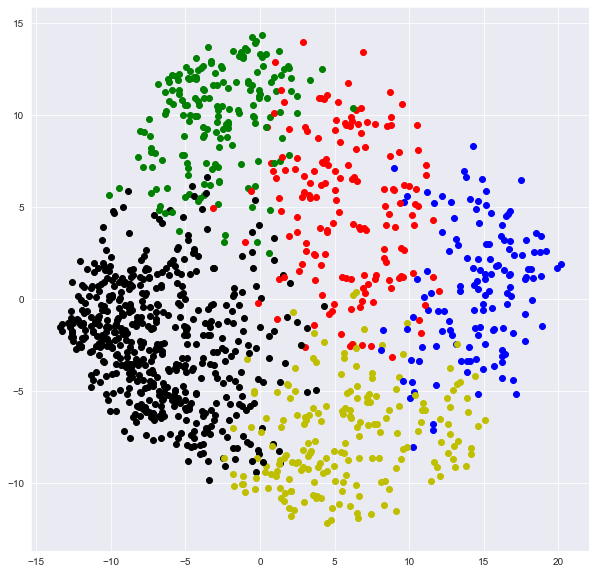

In [69]:
echantillon1 = C[:,0]
echantillon2 = C[:,1]
coul = ['b', 'r', 'g', 'k', 'y']
plt.figure(figsize = (10, 10))
for i, j, nom, indcoul in zip(echantillon1, echantillon2, 
                              np.linspace(1, np.shape(C[:,:])[0], 
                                          num=np.shape(C[:,:])[0]), classesCAH):
    plt.scatter(i, j, c = coul[indcoul - 1])
#plt.axis((-2,2,-1,1))  
plt.show()

In [70]:
#comparaison avec k-means

In [54]:
VelibCP = C[:,0:5] # cinq premières composantes
kmeans = KMeans(n_clusters = 5, random_state = 0, n_jobs = -1).fit(marsCP)
kclassesACP = kmeans.labels_
# effectifs des classes
pd.DataFrame(kclassesACP).hist()


NameError: name 'marsCP' is not defined